In [1]:
import matplotlib.pyplot as plt
from PIL import Image  # Import Image from PIL
from utils import utils_image
import json

# Define the path where the fashion dataset is stored
FASHION_DATASET_HOME = '/home/jcaldeira/dressing_virtuel_data_collector/media/images/'
IMAGE_TMP_DIR='/tmp/virtual_dressing/'
#image = '0c0bfbde088d5b2f94f10b47f5b6352c28cbc148.jpg'
image = '100_0519.JPG'
#image = '20150501_161427.jpg'
#image = '100_0532.JPG'


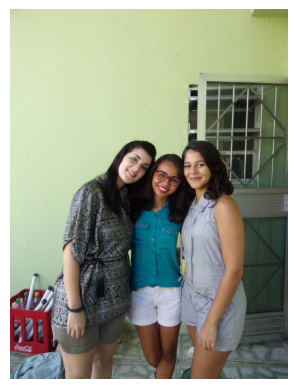

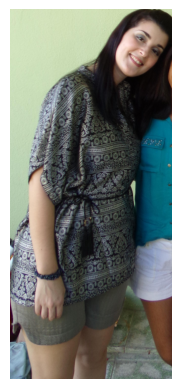

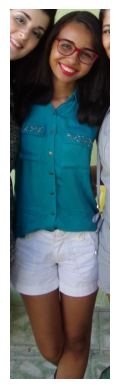

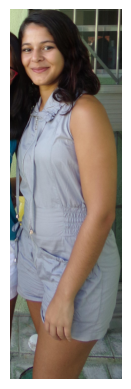

In [2]:
test = Image.open(FASHION_DATASET_HOME +'/'+ image)
plt.imshow(test)
plt.axis('off')  # Turn off the axis
plt.show()

from broker import tasks

person_response = tasks.object_detection.delay(
    FASHION_DATASET_HOME +'/'+ image,
    'person').result

# Check if the response is OK
if person_response.ok:
    data_obj_detection = json.loads(person_response.content)
    for image_base64 in data_obj_detection['images']:
        image_buffer = utils_image.convert_base64_to_bytesIO(image_base64)
        image_crop = Image.open(image_buffer)
        plt.imshow(image_crop)
        plt.axis('off')  # Turn off the axis
        plt.show()


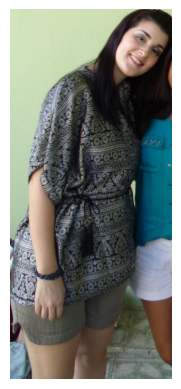

In [ ]:
import base64
import io
import os


encoded_zip_file = base64.b64encode(person_response.content).decode('utf-8') 

for image_base64 in data_obj_detection['images']:
    image_buffer = utils_image.convert_base64_to_bytesIO(image_base64)
    image_crop = Image.open(image_buffer)
    file_name = utils_image.generate_image_name()
    image_crop.save(IMAGE_TMP_DIR + '/' + file_name)
    img_buffer = utils_image.image_base64_to_buffer(image_base64)

    face_response = tasks.face_detection.delay(
        FASHION_DATASET_HOME +'/brii/brii.jpg',
        IMAGE_TMP_DIR + '/' + file_name).result

    if face_response.status_code == 200:
        data_face_detection = json.loads(face_response.content)
        image_buffer = utils_image.convert_base64_to_bytesIO(data_face_detection['images'])
        image = Image.open(image_buffer)
        plt.imshow(image)
        plt.axis('off')  # Turn off the axis
        plt.show()
        image.save(FASHION_DATASET_HOME + "/face_detection/teste.jpg")

    os.remove(IMAGE_TMP_DIR + '/' + file_name)

In [26]:
# Fetch categories from the API and store them in dictionaries
print('Getting Categories from Database ...')
dict_genders = tasks.get_categories('genders','gender')
dict_seasons = tasks.get_categories('seasons','name')
dict_colors = tasks.get_categories('colors','name')
dict_usage = tasks.get_categories('usage_types','name')
dict_article = tasks.get_categories('article_types','name')

dict_of_categories = {
    'gender': list(dict_genders.keys()),
    'season': list(dict_seasons.keys()),
    'color': list(dict_colors.keys()),
    'usage': list(dict_usage.keys()),
    'article': list(dict_article.keys())
}



Getting Categories from Database ...


In [27]:
# Loop through all images in the dataset
#image_path = FASHION_DATASET_HOME + '/' + image
image_path = FASHION_DATASET_HOME + "/face_detection/teste.jpg"

print('Executing the segmentation over the image...')
#response = seg_evaluation(image_path)
response = tasks.image_segmentation(image_path)



Executing the segmentation over the image...


In [28]:
print(response.content)

b'{"images":["/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAePBQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD1oe/FB6H1oOfSm5ycc1wmI4UlA6UlAAcE89vSlLA9KAAB0pDjPegBQAKQnHAoNKoBNADlHfmg7ATgH8aVmAFQ7iw5PegB/wBDSE4PegDilIyPegYMSQMc0YwKUDCjNNZuB79aAAtg0E8Um0k5peM470AJg0

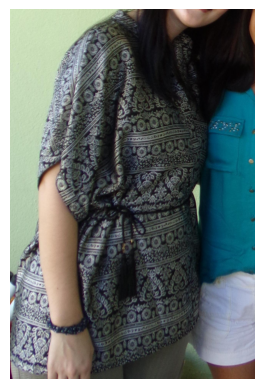

{'gender': 'Unisex', 'season': 'Summer', 'color': 'Preto', 'usage': 'Ethnic', 'article': 'Shrug'}


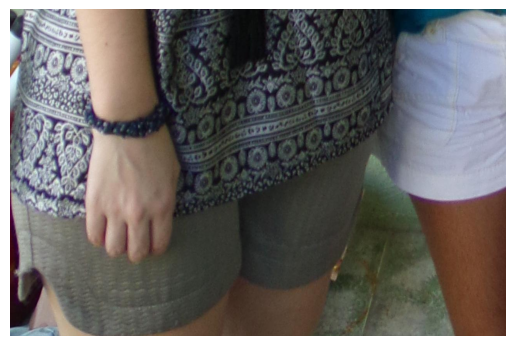

{'gender': 'Girls', 'season': 'Summer', 'color': 'Khaki', 'usage': 'Casual', 'article': 'Shorts'}


In [30]:
import io, zipfile
# Check if the response is OK
if response.status_code == 200:

    image_segmentation = json.loads(response.content)
    for image_b64 in image_segmentation['images']:
        image_bytes = utils_image.convert_base64_to_bytesIO(image_b64)

        image = Image.open(image_bytes)
        plt.imshow(image)
        plt.axis('off') 
        plt.show()

        # Convert the image into an in-memory binary file
        img_byte_arr = io.BytesIO()  # Create a bytes buffer
        image.save(img_byte_arr, format='JPEG')  # Save the image in JPEG format in the buffer
        img_byte_arr.seek(0)  # Go back to the start of the BytesIO buffer

        # Perform CLIP evaluation to get the best matching category for each attribute
        selected_categories = tasks.image_classification(dict_of_categories, img_byte_arr, file_name)

        print(selected_categories)